In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [20]:
height = 32
width = 64
size = height*width
path = "..\..\datasets\CIC-IDS-2017"
csv_file = path + "\cicids2017_img.csv"

In [21]:
df = pd.read_csv(path+"\CICIDS_converted_data.csv")

In [22]:
df = df.drop_duplicates()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763416 entries, 0 to 1410250
Columns: 1505 entries, payload_byte_1 to label
dtypes: float64(1), int64(1502), object(2)
memory usage: 8.6+ GB


In [24]:
df.columns

Index(['payload_byte_1', 'payload_byte_2', 'payload_byte_3', 'payload_byte_4',
       'payload_byte_5', 'payload_byte_6', 'payload_byte_7', 'payload_byte_8',
       'payload_byte_9', 'payload_byte_10',
       ...
       'payload_byte_1496', 'payload_byte_1497', 'payload_byte_1498',
       'payload_byte_1499', 'payload_byte_1500', 'ttl', 'total_len',
       'protocol', 't_delta', 'label'],
      dtype='object', length=1505)

In [25]:
df.protocol.unique()

array(['udp', 'tcp'], dtype=object)

In [26]:
df.protocol = df.protocol.apply(lambda x: 1 if x == "tcp" else 0 )

In [27]:
df.protocol.unique()

array([0, 1], dtype=int64)

In [28]:
df.label.unique()

array(['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed',
       'Infiltration', 'PortScan', 'SSH-Patator',
       'Web Attack – Brute Force', 'Web Attack – Sql Injection',
       'Web Attack – XSS'], dtype=object)

In [29]:
len(df.label.unique())

15

In [30]:
df.label.value_counts() / len(df)

label
BENIGN                        0.414680
DoS Hulk                      0.181884
DoS GoldenEye                 0.139702
DoS slowloris                 0.080010
DoS Slowhttptest              0.077863
SSH-Patator                   0.049592
Infiltration                  0.022054
FTP-Patator                   0.016920
Web Attack – Brute Force      0.009302
Bot                           0.002675
Web Attack – XSS              0.002379
Heartbleed                    0.001606
DDoS                          0.001078
PortScan                      0.000242
Web Attack – Sql Injection    0.000014
Name: count, dtype: float64

In [13]:
df = df.to_numpy()
df.shape

(763416, 1505)

In [14]:
# normalize payload, ttl, total_len
for col_index in range(df.shape[1]-3):
    column = df[:, col_index]
    column_normalized = (column - np.min(column)) / (np.max(column) - np.min(column))
    df[:, col_index] = column_normalized

In [15]:
# inspect t_delta
print(np.min(df[:, -2]), np.max(df[:, -2]))

-1.8e-05 58.352796


In [16]:
# normalize t_delta
column = df[:, -2]
column_normalized = (column - np.min(column)) / (np.max(column) - np.min(column))
df[:, -2] = column_normalized

(1504,)
BENIGN
(2048,)
(32, 64)


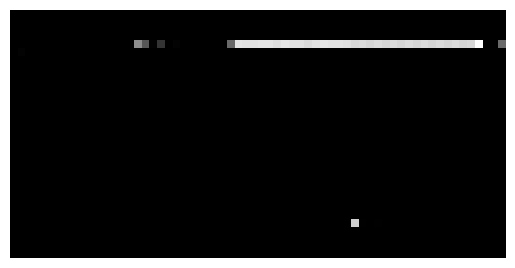

DONE


In [17]:
def convert_dataset_to_grayscale_image(arr):
    for idx, row in enumerate(arr):
        data = row[:-1]
        label = row[-1]
        print(data.shape)
        print(label)
        
        data = np.pad(data, pad_width=int((size-len(data))/2), constant_values=0)
        print(data.shape)
        data = data.reshape(height, width).astype('float64')
        print(data.shape)
        
        plt.imshow(data, cmap='gray')
        plt.axis('off')  # Remove axes
        plt.show()
        
        break
    print("DONE")
        
convert_dataset_to_grayscale_image(df)

(1504,)
BENIGN
(32, 64)
(32, 64)
(32, 64)
(32, 64, 3)


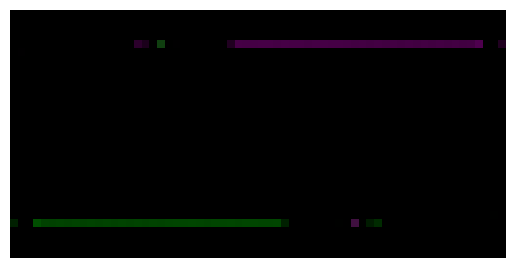

DONE


In [17]:
def convert_dataset_to_rgb_image(arr):
    for idx, row in enumerate(arr):
        data = row[:-1]
        label = row[-1]
        print(data.shape)
        print(label)
        
        data = np.pad(data, pad_width=int((size-len(data))/2), constant_values=0)
        data = data.reshape(height, width)
        
        channel_1 = data.astype('float64')
        print(channel_1.shape)
        channel_2 = np.rot90(channel_1, k=2).reshape(height, width)
        print(channel_2.shape)
        channel_3 = np.rot90(channel_2, k=2).reshape(height, width)
        print(channel_3.shape)
        img = np.stack((channel_1, channel_2, channel_3)).transpose((1, 2, 0))
        print(img.shape)
        
        plt.imshow(img)
        plt.axis('off')  # Remove axes
        plt.show()
        
        break
    print("DONE")
        
convert_dataset_to_rgb_image(df)

In [11]:
# with open(csv_file, 'w') as f:
#     np.savetxt(f, [np.array(["file_name", "label"])], delimiter=',', fmt='%s')

def convert_dataset_to_image(arr):
    with open(csv_file, 'a') as f:
        for idx, row in enumerate(arr):
            data = row[:-1]
            label = row[-1]
            if idx % 10_000 == 0:
                    print(idx, label)
            
            data = np.pad(data, pad_width=int((size-len(data))/2), constant_values=0)
            data = data.reshape(height, width)
            
            channel_1 = data.astype('float64')
            channel_2 = np.rot90(channel_1, k=2).reshape(height, width)
            channel_3 = np.rot90(channel_2, k=2).reshape(height, width)
            img = np.stack((channel_1, channel_2, channel_3)).transpose((1, 2, 0))
            
            file_name = f"cic_ids_2017_{idx}.png"
            cv2.imwrite(path+"\image\\"+file_name, img*255)
            
            log = np.array([file_name, label])
            np.savetxt(f, [log], delimiter=',', fmt='%s')
    print("DONE")
        
# convert_dataset_to_image(df)